# Régression linéaire avec TensorFlow 

Dans ce notebook, on va voir comment utiliser TensorFlow pour entraîner un modèle de régression linéaire sur le jeu de données de *Boston* de Sklearn. 
Le but sera de prédire  le prix des maisons en fonction de leurs caractéristiques. 

## Importation des packages

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD

## Importation des données

In [ ]:
boston = load_boston()
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

X_train, X_test, y_train, y_test = train_test_split(X, boston['target'], test_size=0.33, random_state=42)

std_scaler = StandardScaler().fit(X_train, y_train)

X_train  =  std_scaler.transform(X_train)
X_test = std_scaler.transform(X_test)

X_train_tf = tf.convert_to_tensor(X_train)
X_test_tf = tf.convert_to_tensor(X_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

## Création de l'architecture

La fonction `Dense` nous permet d'initialiser les poids de notre régression linéaire et d'appliquer une multiplication matricielle entre nos poids et nos exemples. 

Pour plus d'informatons, n'hésitez pas à lire la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [ ]:
def linear_regression(input):
  ### Your Code ###
  return None

Initialiser notre modèle.

In [ ]:
rl_model = linear_regression(13)

Prédire notre jeu d'entraînement.

In [ ]:
prediction = rl_model(X_train_tf)

In [ ]:
mean_absolute_error(prediction, y_train)

22.97079645556708

## Définir la fonction de coût

Nous allons maintenant initialiser notre fonction de coût.

Vous pouvez trouver les différentes fonctions de coût implémenter par TensorFlow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses).

In [ ]:
### Your code ###
loss = None

## Définir l'algorithme d'optimisation

Nous allons maintenant initialiser notre fonction d'optimisation qui va mettre à jour nos poids. Il existe des améliorations du gradient descent censé être plus rapide et performant. 

Vous pouvez trouver les différents algorithmes d'optimisation implémenter par Tensorflow dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

In [ ]:
### Your code ###
opt = None

## Définir la fonction d'entraînement

Nous allons maintenant initialiser la fonction d'entraînement de notre modèle en utilisant notre modèle, notre fonction de coût et notre algorithme d'optimisation.

N'hésitez pas à regarder dans la [documentation](https://www.tensorflow.org/api_docs/python/tf/GradientTape) pour en apprendre plus sur le calcul des gradients. 

In [ ]:
def step(model, opt, loss, X, y):

  # garder la trace de nos gradients
  with tf.GradientTape() as tape:

    ### Your code ### 

    # faire une prédiction en utilisant le modèle
	  pred = None

    # Calculer le coût
	  train_loss = None
  
	# calculer les gradients en utilisant tape 
  grads = None

  # mettre à jour les poids du modèle (fonction apply_gradients)
  
 
  return model, train_loss

## Entraîner notre modèle

Il est maintenant temps d'entraîner notre modèle

In [ ]:
epoch = 1000
history_train = []
history_test = []

for e in range(epoch) : 

  # mise à jour des poids
  rl_model, train_loss = step(rl_model, opt, loss, X_train_tf, y_train_tf)

  # prédiction sur le jeu de test
  test_pred = rl_model(X_test_tf)
  test_loss = mean_absolute_error(test_pred, y_test)

  # sauvegarde des coûts
  history_train = np.append(history_train, train_loss)
  history_test = np.append(history_test, test_loss)

  print('train_loss : '+str(np.squeeze(train_loss))+ ' test_loss : '+str(test_loss))


train_loss : 20.9708 test_loss : 19.47864539109304
train_loss : 20.9608 test_loss : 19.468645407768065
train_loss : 20.9508 test_loss : 19.458645413021838
train_loss : 20.9408 test_loss : 19.448645409709677
train_loss : 20.930801 test_loss : 19.43864542995384
train_loss : 20.920801 test_loss : 19.428645446628863
train_loss : 20.910799 test_loss : 19.41864545188264
train_loss : 20.900799 test_loss : 19.40864544857048
train_loss : 20.8908 test_loss : 19.398645468100813
train_loss : 20.880798 test_loss : 19.388645484775836
train_loss : 20.870798 test_loss : 19.378645489315783
train_loss : 20.860802 test_loss : 19.368645486003622
train_loss : 20.8508 test_loss : 19.358645505533957
train_loss : 20.8408 test_loss : 19.348645522208983
train_loss : 20.8308 test_loss : 19.338645527462756
train_loss : 20.820799 test_loss : 19.328645523436766
train_loss : 20.810799 test_loss : 19.318645542967104
train_loss : 20.800802 test_loss : 19.308645558928298
train_loss : 20.7908 test_loss : 19.298645564895

Visualisation de l'évolution du coût pendant l'entraînement. 

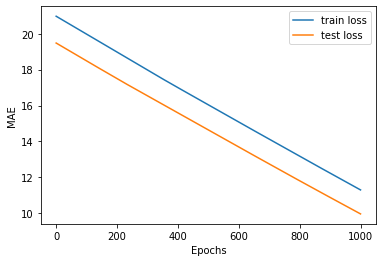

In [ ]:
plt.plot(np.arange(epoch), history_train, label='train loss')
plt.plot(np.arange(epoch), history_test, label='test loss')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Sauvegarde du modèle

Maintenant que notre modèle est entraîné, il est temps de le sauvegarder.

In [ ]:
rl_model.save_weights('linear_regression')

Initalisons à nouveau notre modèlre à random.

In [ ]:
rl_model = linear_regression(13)

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

22.970796456786523

Nous pouvons revenir à nos poids entraîner en charger nos précédens poids.

In [ ]:
rl_model.load_weights('linear_regression')

In [ ]:
prediction = rl_model(X_train_tf)
mean_absolute_error(prediction, y_train)

11.29120541575384